# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model. 
    - a simple linear regression model has a dependent variable set equal to an estimated intercept value, plus a independent variable times it's slope. It's a model that estimates the relationship between one independent variable and one dependent variable with a straight line.
- What type of machine learning is linear regression?
    - Supervised machine learning model
- What is a “line of best fit” using the OLS method?
    - It is the line that is closest to all data points simultaneously
- What is the difference between correlation and regression?
    - correlation quantifies the strength of a linear relationship, regression expresses the relationship with a model (or equation)
- Describe a scenario when you would use linear regression and why you would use it. 
    - if i wanted to compare consumer purchasing behavior - like if I wanted to predict what products will be popular in different regions of the country


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity 
    - it can be explained with a straight line
- Normality
    - the distribution follows 
- Homoscedasticity
    - the variance of the terms should be constant (shows no relationship)
- No multicollinearity
    - the variables are independent of each other
- No endogeneity
    - the x variable is correlated with the error term, this is a no no
- No autocorrelation
    - error terms need to be independent of each other

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0) - This is the point where the line would intercept with the y axis. 
- Coefficient of Independent Variable (B1) - This is the slope of the line, it's attached to the independent variable (x1)
- Standard Error - The actual values minus the predicted values
- T-Statistic - The size of the difference relative to the variation in your data. The greater the magnitude of T-statistic, the greater the evidence against the null hypothesis.
- P-Value of T-Statistic (from the independent variable) - < .05, means the t statistic variable is statistically significant


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared - shows hos much of the total vairability of the dta set is explained by your regression model. "How well your model fits the data". Ranges from 0 - 1. 0 means your regression explains NONE of the variability. 1 means your regression explains the entire variability.
- Adjusted R-squared - used when performing Multiple linear regression (it's like R-squared but it punished multiple useless variables being added). In single linear regression, R-squared and adjusted R-squared are equal.


### Step 5: Interpret A Results Table

1) In this example, what is the name of the dependent variable and what is the name of the independent variable?
   - Dependent variable: salary
   - Independent variable: years_experience

2) In this example, how much of the variability in the data is explained by the model?
    - R-squared: 0.957 - The model is a very good explanation of the variability
    

3) What is the p-value of the t-statistic in this example? Is this result considered to be statistically significant?
    - P>|t|: 0.000 - Yes, this is statisticappy significant.
    

4) What is the intercept/constant?
    - Intercept/constant: 2.579e+04
    

5) What is the coefficient of the independent variable?
    - ind variable coef: 9449.9623
    

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

sns.set()

In [3]:
# load data

In [4]:
hs_df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [5]:
# explore data below (you will need to make new cells)

In [6]:
hs_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


In [7]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [8]:
hs_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
count,2.045600e+04,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20452.000000,20456.000000,20456.000000,20456.000000
mean,4.634802e+09,4.863355e+05,3.310422,2.032062,1942.120258,10302.509875,1.473455,0.004155,1.179165,3.411322,7.514241,1679.184542,262.887808,1969.985041,95297.064395,47.559194,-122.219543,1902.208594
std,2.877504e+09,2.398423e+05,0.855849,0.689049,724.345438,12700.282036,0.537955,0.064329,0.661116,0.652286,1.026879,683.115368,390.859372,29.355600,15428.241686,0.139330,0.138576,585.143495
min,1.000102e+06,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,3.000000,300.000000,0.000000,1900.000000,9801.000000,47.155900,-122.512000,399.000000
25%,2.161850e+09,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1170.000000,0.000000,1950.750000,98032.000000,47.467200,-122.332000,1460.000000
50%,3.992700e+09,4.350000e+05,3.000000,2.000000,1840.000000,7412.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1500.000000,0.000000,1972.000000,98072.000000,47.569650,-122.244500,1790.000000
75%,7.387500e+09,6.020000e+05,4.000000,2.500000,2410.000000,10022.250000,2.000000,0.000000,1.000000,4.000000,8.000000,2080.000000,520.000000,1995.000000,98118.000000,47.679400,-122.134000,2260.000000
max,9.900000e+09,1.640000e+06,6.000000,4.250000,4600.000000,133729.000000,3.500000,1.000000,5.000000,5.000000,12.000000,3960.000000,1540.000000,2050.000000,98199.000000,47.777600,-121.315000,3790.000000


In [9]:
hs_df = hs_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'view']]

In [10]:
hs_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,view
0,221900.0,3,1.00,1180,1.0,7.0,1
1,538000.0,3,2.25,2570,2.0,7.0,1
2,180000.0,2,1.00,770,1.0,6.0,1
3,604000.0,4,3.00,1960,1.0,7.0,1
4,510000.0,3,2.00,1680,1.0,8.0,1


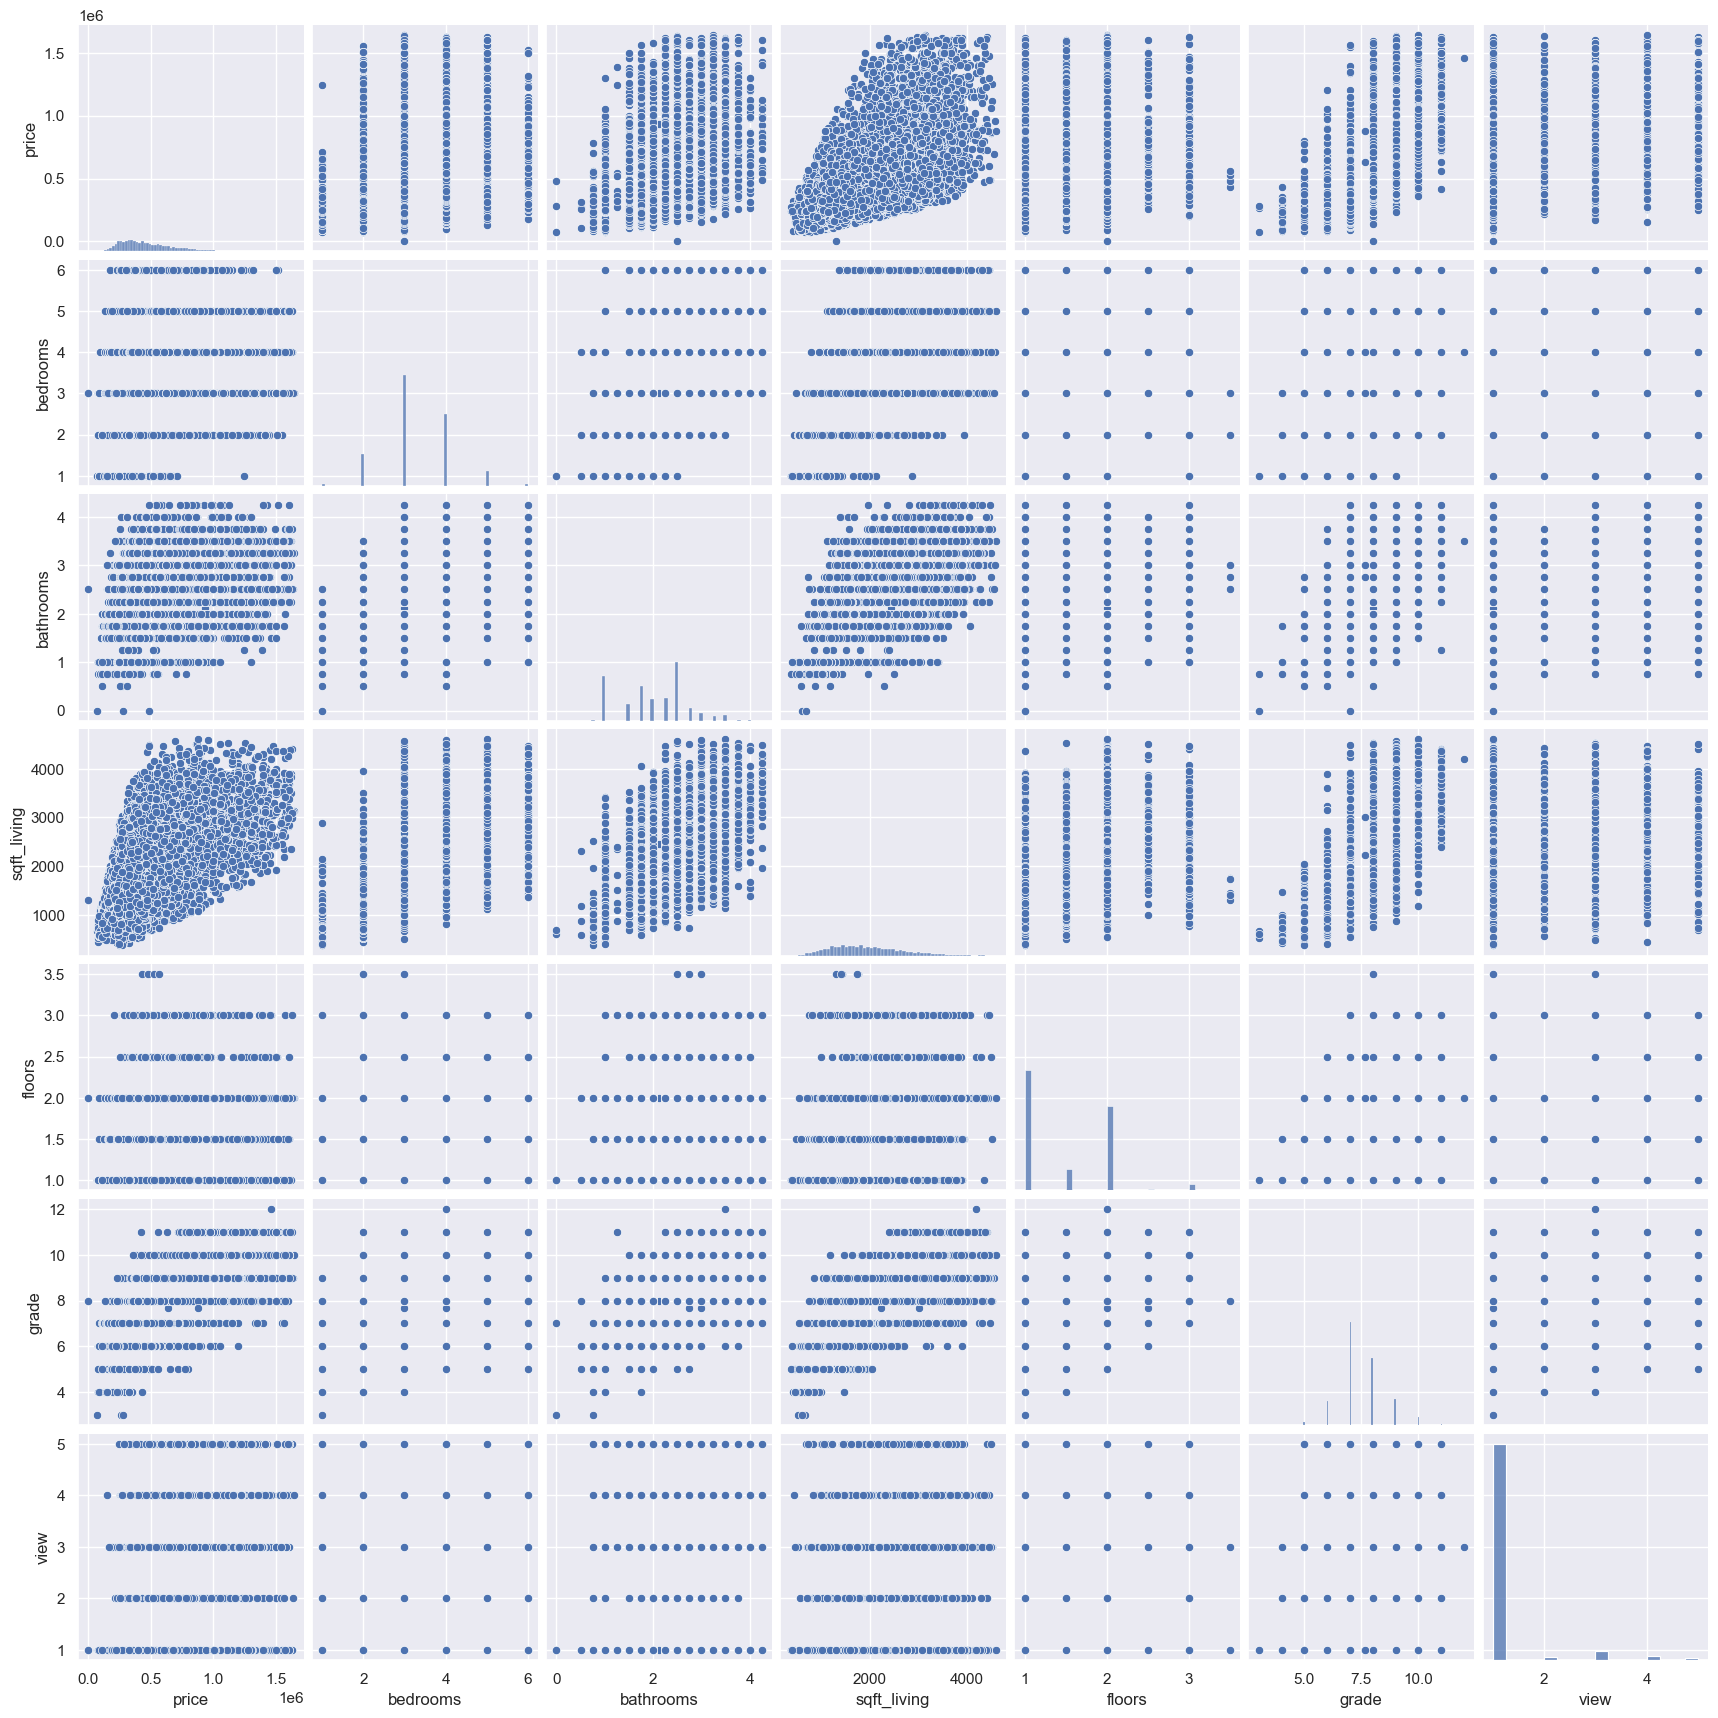

In [11]:
sns.pairplot(hs_df)

In [12]:
hs_df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,grade,view
price,1.000000,0.285851,0.441803,0.613010,0.269991,0.626245,0.296863
bedrooms,0.285851,1.000000,0.487899,0.601646,0.164007,0.329490,0.032773
bathrooms,0.441803,0.487899,1.000000,0.710514,0.514539,0.614198,0.103642
sqft_living,0.613010,0.601646,0.710514,1.000000,0.357559,0.701670,0.178901
floors,0.269991,0.164007,0.514539,0.357559,1.000000,0.465698,0.006431
grade,0.626245,0.329490,0.614198,0.701670,0.465698,1.000000,0.160320
view,0.296863,0.032773,0.103642,0.178901,0.006431,0.160320,1.000000


<AxesSubplot:>

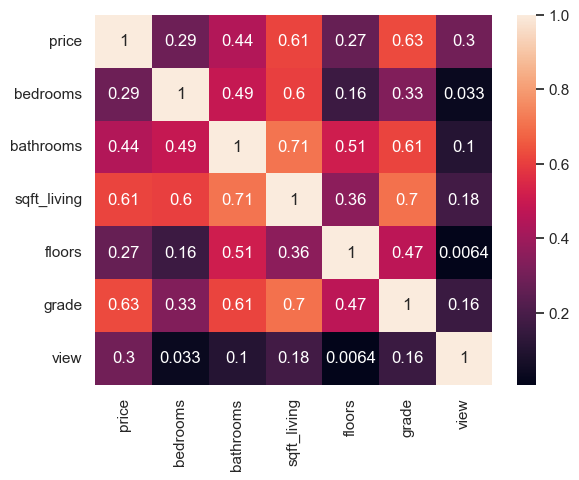

In [13]:
sns.heatmap(hs_df.corr(), annot=True)

It looks like Price is most highly correlated with sqft_living (.61), bathrooms(.44) - less correlated with bedrooms(.29), and floors (.27).

In [14]:
# y=hs_df['price']
# x1=hs_df['sqft_living']

In [15]:
# x=sm.add_constant(x1)
# results = sm.OLS(y,x).fit()
# results.summary()

### Step 3: Determine independent and dependent variable

In [16]:
# set X 
x1 = hs_df['sqft_living']

# set Y 
y = hs_df['price']

In [17]:
# visualize relationship between X and Y

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

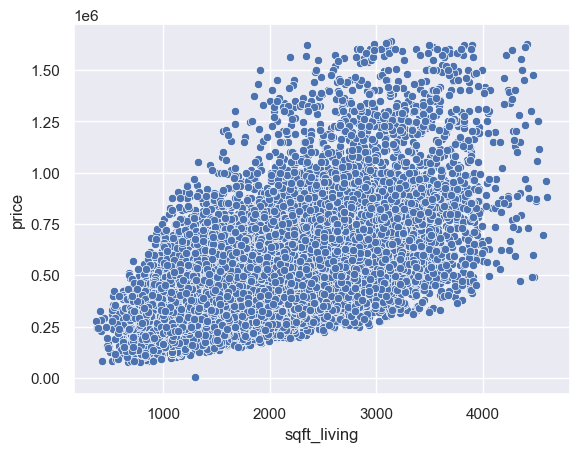

In [18]:
sns.scatterplot(data=hs_df, x='sqft_living', y='price')
# sns.scatterplot(x1, y)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [19]:
# fit model to X and Y variables (you will need to make more cells)

In [20]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
# results.summary()

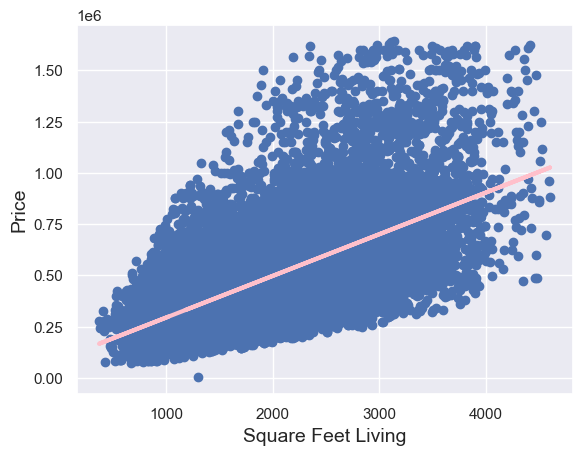

In [21]:
plt.scatter(x1,y)
yhat = 202.9775*x1 + 9.213e+04
fig = plt.plot(x1, yhat, lw=3, c='pink', label='regression line')
plt.xlabel('Square Feet Living', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

### Step 5: Interpret Model Summary 

In [22]:
# print out and interpret model summary // terms identified below

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared 
    - The R2 of the model is 0.376. I'd consider this a mediocre representation of the data, it fits well, but could be improved.
- Coefficient of independent variable
    - the coefficient of the independent variable is 202.9775.
- P-value of T-statistic
    - the P value of the t stat is 0.000, which would suggest there is a significant relationship between price and sqft_living
- P-value of F-statistic
    - pvalue of the f statistic is 0.000, also suggesting that there is a strong relationship in the data represented by the model

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [24]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [25]:
new_data = pd.DataFrame({'constant':1, 'sqft_living':[1200,3000]})
new_data

,constant,sqft_living
0,1,1200
1,1,3000


In [26]:
predictions = results.predict(new_data)

In [27]:
predictions_df = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictions_df)
joined

,constant,sqft_living,Predictions
0,1,1200,335701.761916
1,1,3000,701061.325176


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [28]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

In [29]:
x1 = hs_df[['sqft_living', 'floors']]
y = hs_df['price']

In [30]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     6234.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -2.7756e+05
No. Observations:               20456   AIC:                         5.551e+05
Df Residuals:                   20453   BIC:                         5.552e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.726e+04   4545.127     14.797      0.000    5.83e+04    7.62e+04
sqft_living   196.0811      1.954    100.345      0.000     192.251     199.911
floors       2.597e+04   2631.127      9.870      0.000    2.08e+04    3.11e+04
==============================================================================
Omnibus:                     3967.612   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9339.860
Skew:                           1.096   Prob(JB):                         0.00
Kurtosis:                       5.481   Cond. No.                     7.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 - R2 is 0.379, which barely is a change from the single regression's R2.
Adjusted R2 - is actually the same as R2, that would suggest that adding the floors variable really didn't affect or help the regression that much.
Coef of ind variable - for floors was 2.597e+04, it's pretty huge but doesn't affect the model much.
Pvalue of T - 0.000 would suggest statistically significant
Pvalue of F0.00 - again would suggest significance

In [31]:
x1 = hs_df[['sqft_living', 'grade']]
y = hs_df['price']

Dang - The grade significantly increased the R-squared, which would suggest that having the variable of "grade" makes a better fitting regression line. Adj R-squared is nearly equal which shows that adding the variable does in fact help the model.

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [32]:
# fit new regression model (you will need to make more cells)

In [33]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
- Adjusted R-squared
- Coefficient of independent variables
- P-value of T-statistic
- P-value of F-statistic



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [34]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [35]:
new_data2 = pd.DataFrame({'const':1, 'sqft_living':[1200, 3000, 1500, 1700, 2000], 'grade':[5,6,7,8,9]})
# new_data2 = pd.DataFrame({'const':1, 'sqft_living':1200, 'grade':[5,6,7,8,9]})

new_data2

,const,sqft_living,grade
0,1,1200,5
1,1,3000,6
2,1,1500,7
3,1,1700,8
4,1,2000,9


In [36]:
predictions2 = results.predict(new_data2)
predictions2

0    175453.240489
1    469485.432944
2    389877.559495
3    502750.932118
4    626946.730980
dtype: float64

In [37]:
predictions2_df = pd.DataFrame({'Predictions': predictions2})
joined2 = new_data2.join(predictions2_df)
joined2

,const,sqft_living,grade,Predictions
0,1,1200,5,175453.240489
1,1,3000,6,469485.432944
2,1,1500,7,389877.559495
3,1,1700,8,502750.932118
4,1,2000,9,626946.730980


### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [38]:
# create new markdown cell and write down your observations

The simple linear regression with only sqft_living had an R squared of 0.376. When I added floors, the R2 didn't change by much and had little power over the model. When I added grade, it enhanced the R2 to 0.452 and kept the Adj R2 at 0.451 indicating that it had a significant impact on the model.

# Part 4 - Multivariate Time Series Analysis

In [39]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 